<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/phy122_lab4t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Work

Name

Date

#   <font color='Green'> **Setup** </font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π = np.pi

In [ ]:
class body(object):
    # 11/22/21 ",
    ''' A class of body in kinematics '''
    def __init__(self): 

        ### basics ",
        self.apply_force    = np.zeros(3) 
        self.position       = np.zeros(3) 
        self.mass           = 1. 
        self.velocity       = np.zeros(3) 
        self.size           = 0. 
        self.air_resistence = 0. 

    def on_ramp(self, Θ = 0., static_friction=0., kinetic_friction=0.): 

        Θ = np.pi*Θ/180 
        self.e_tangent = np.array([ np.cos(Θ), np.sin(Θ), 0.]) 
        self.e_normal  = np.array([-np.sin(Θ), np.cos(Θ), 0.]) 
        self.static_friction  = static_friction 
        self.kinetic_friction = kinetic_friction 

        return None

    def force_response(self, acting_force): 

        ### computes force normal to forces ",
        f_react_normal  = - np.dot(acting_force, self.e_normal ) * self.e_normal 

        ### computes forces tangent to forces ",
        f_react_tangent = - np.dot(acting_force, self.e_tangent) * self.e_tangent

        ## kinetic friction
        if np.linalg.norm(f_react_tangent) > np.linalg.norm(self.static_friction * f_react_normal): 
            f_react_tangent = np.linalg.norm(self.kinetic_friction * f_react_normal) * self.e_tangent 

        self.f_react_tangent = f_react_tangent
        self.f_react_normal  = f_react_normal 

        return f_react_tangent, f_react_normal

    
def VelocityVerlet(T, cart, F=None): 

    Δt = T[1] - T[0]

    if F is None:
        F = np.zeros((len(T),3))

    x_t = np.zeros((len(T),3))
    v_t = np.zeros((len(T),3))

    x_t[0] = cart.position
    v_t[0] = cart.velocity
    a_told = np.zeros(3)
    for t in range(len(T)-1):
        x_t[t+1] = x_t[t] + v_t[t] * Δt + 0.5 * a_told * (Δt*Δt) 

        f_react_tangent, f_react_normal = cart.force_response(F[t])
        a_tnew  = (F[t] + f_react_tangent + f_react_normal) / cart.mass

        v_t[t+1]  = v_t[t] + 0.5 * (a_told + a_tnew) * Δt 
        a_told = a_tnew

    return x_t, v_t

def VelocityVerletRot(T, cart, F=None): 

    Δt = T[1] - T[0]

    if F is None:
        F = np.zeros((len(T),3))

    x_t = np.zeros((len(T),3))
    v_t = np.zeros((len(T),3))
    f_t = np.zeros((len(T),3))

    x_t[0] = cart.position
    v_t[0] = cart.velocity
    f_t[0] = -np.dot( v_t[0], v_t[0]) / (np.linalg.norm(x_t[0])**2) * ( x_t[0] - np.zeros(3) )
    a_told = np.zeros(3)
    for t in range(len(T)-1):
        x_t[t+1] = x_t[t] + v_t[t] * Δt + 0.5 * a_told * (Δt*Δt) 

        a_centri = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - np.zeros(3) )
        #a_cenfu  = np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - np.zeros(3) )

        ##f_react_tangent, f_react_normal = cart.force_response(F[t])
        a_tnew   = a_centri ##+ (F[t] + f_react_tangent + f_react_normal) / cart.mass
        f_t[t+1] = cart.mass * a_tnew

        v_t[t+1]  = v_t[t] + 0.5 * (a_told + a_tnew) * Δt 
        a_told    = a_tnew

    return x_t, v_t, f_t

#   <font color='Red'> **Experiment 1** </font>

### <font color='Red'>  Let's get acquainted with rotational motion. </font>

#### <font color='Red'>  In this lab we assume the center of the circular motion is at the origin (0, 0, 0), and the circular motion occurs in the x-y plane. Therefore lets define a body class, and give it initial velocity (in the y-direction) and some initial dispalcement (say in the x direction) from the origin. Then lets place it on a ramp with 0 degrees and no friction. </font>

#### <font color='Red'>  Lets define a time array to indicate all moment of time considered, i.e. as done in previous labs. </font>

#### <font color='Red'>  Next lets use the VelocityVerletRot (rotational) defintion to integrate our equations-of-motion, and obtain a trajectory and forces. Set External forces to None. </font>

####   <font color='Red'> Plot x(t), y(t), z(t) trajectories (in time) on 1 graph, in conclusion explain this graph </font>

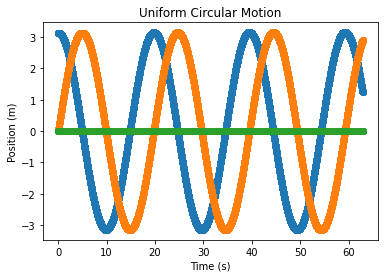

####   <font color='Red'> Plot v_x(t), v_y(t), v_z(t) velocities (in time) on 1 graph, in conclusion explain this graph </font>

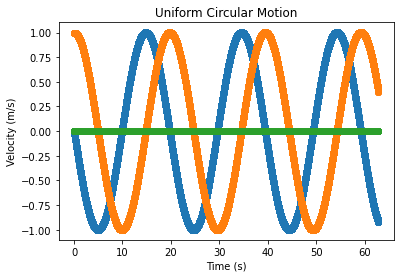

###   <font color='Red'> Plot a parametric plot with x and y </font>

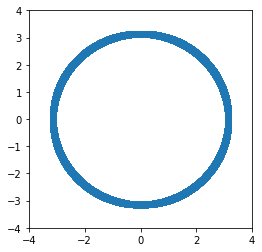

#   <font color='Red'> **Experiment 2**  </font>

### <font color='Red'>  Let's now experiment *for-loop over object configurations*. Let's begin with by **varying the velocity**, keeping the objects mass and radius fixed. </font>



#### <font color='Red'> Specify a range of speeds, you'd like to test. And an empty array of what you'd like to measure, i.e. the force (of the same length of the array of speeds). </font>

#### <font color='Red'> Setup a time-array like before to test the dynamics.  </font>

#### <font color='Red'> Let's run the for-loop, over the velocities we wish to experiment over. </font>

#### <font color='Red'> Plot your data: F vs. v </font>

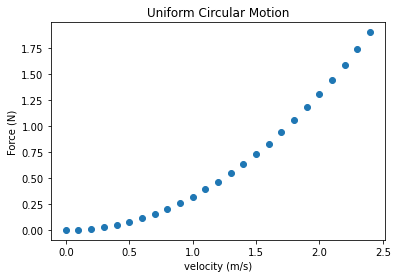

#### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f(R) ~ R). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = R). And print the values of m and c with units. </font>

slope       = 0.329 kg/m
y-intercept = -0.005 N


### <font color='Red'> Get the theoritical slope ratio, e.g. m/R, and print it with units how does it compare with your linear fit? </font>

slope-theory= 0.318 kg/m


#### <font color='Red'> Let's plot this linear function (in F vs. v^2): data, simulation-fit, and theory-fit </font>

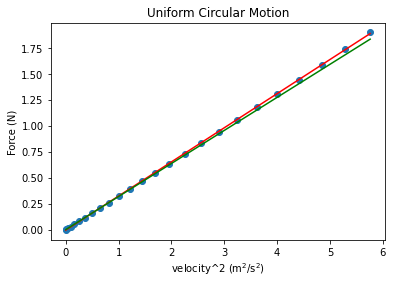

#   <font color='Red'> **Experiment 3** </font>

### <font color='Red'>  Let's now experiment *for-loop over object configurations*. Next let's **varying the Radius** of rotation, keeping the objects mass and velocity fixed. </font>

### <font color='Red'> Define the time array, indicating all moments of time considered </font>

### <font color='Red'> For-loop over Radii considered </font>

### <font color='Red'> Plot the Radii vs. Force graph </font>

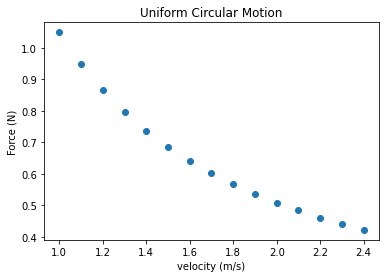

### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f(R) ~ R). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = R). And print the values of m and c with units. </font>

slope       =  1.075 Nm
y-intercept = -0.028 N


### <font color='Red'> Get the theoritical slope ratio, e.g. m v^2, and print it with units how does it compare with your linear fit? </font>

theory-slope=  1.000 Nm


#   <font color='Red'> **Conclusion** </font>

### <font color='Red'> Explain all graphs, and relevant physics invovled in the simulations. Explain the need for a good integration time step $\Delta$t. </font>

Write your Conclusion here